<a href="https://colab.research.google.com/github/brodyanderson/math-6880-Project3/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \
Project 3

# 1. Fashion-MNIST image classification using sklearn

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(len(X_train), -1)
X_test  = X_test.reshape(len(X_test), -1)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# your code here

In [4]:
# Simple Model
import time

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=1)
mlp.fit(X_train, y_train)

start_time = time.time()
mlp.fit(X_train, y_train)
training_time = time.time() - start_time

y_pred = mlp.predict(X_test)


print(f"Training Time: {training_time:.2f} seconds")
print()

print(f" Training Accuracy: {accuracy_score(y_train, mlp.predict(X_train)):4f}")
print()

print(f" Test Accuracy: {accuracy_score(y_test, y_pred):4f}")
print()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Training Time: 80.95 seconds

 Training Accuracy: 0.969333

 Test Accuracy: 0.880700


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1000
           1       0.97      0.97      0.97      1000
           2       0.79      0.80      0.79      1000
           3       0.91      0.82      0.86      1000
           4       0.78      0.85      0.81      1000
           5       0.96      0.96      0.96      1000
           6       0.73      0.68      0.71      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Confusion Matrix:
[[842   2  21  17   7   0 102   1   8   0]
 [  5 974   2  12   2   0   4   0   1   0]
 [ 20   1 796  10 112   1 

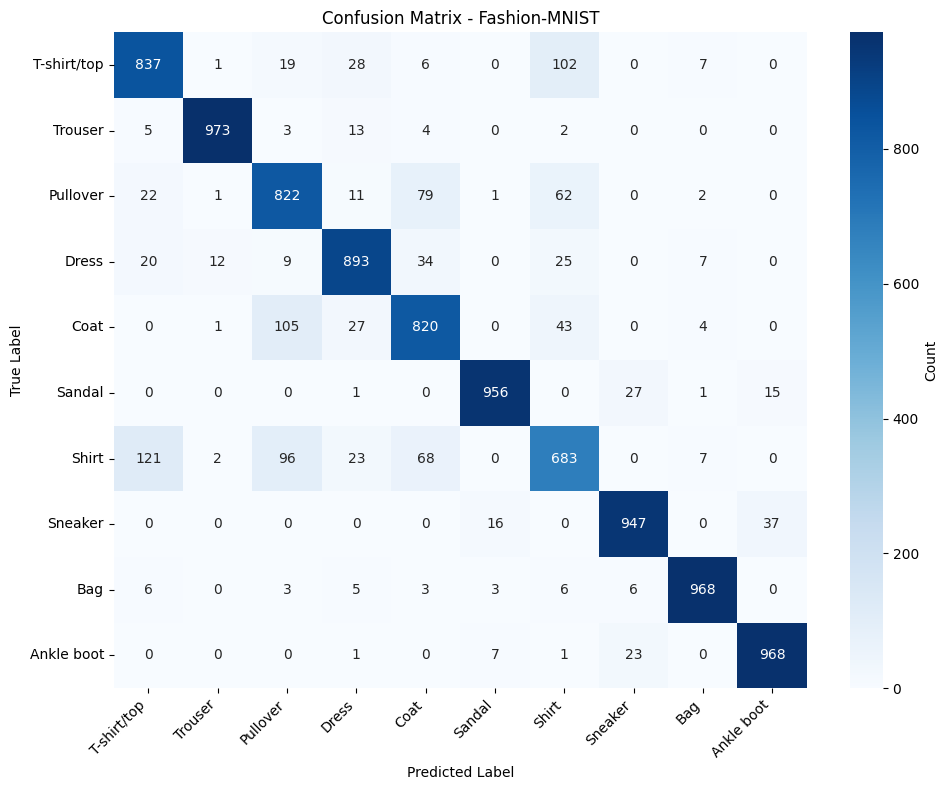

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fashion-MNIST')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Single hidden layer with 100 neurons (default)
mlp = MLPClassifier(hidden_layer_sizes=(100,))

# Two hidden layers: 128 and 64 neurons
mlp = MLPClassifier(hidden_layer_sizes=(128, 64))

# Three hidden layers: 256, 128, and 64 neurons
mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64))

# Smaller network
mlp = MLPClassifier(hidden_layer_sizes=(50,))

# ReLU (default)
mlp = MLPClassifier(activation='relu')

# Logistic/sigmoid
mlp = MLPClassifier(activation='logistic')

# Hyperbolic tan
mlp = MLPClassifier(activation='tanh')

# Identity (linear)
mlp = MLPClassifier(activation='identity')

# Adam optimizer (default) with custom learning rate
mlp = MLPClassifier(solver='adam', learning_rate_init=0.001)

# Stochastic Gradient Descent
mlp = MLPClassifier(solver='sgd', learning_rate_init=0.01)

# L-BFGS (for small datasets)
mlp = MLPClassifier(solver='lbfgs')

# Adaptive learning rate with SGD
mlp = MLPClassifier(solver='sgd', learning_rate='adaptive')

# L2 regularization (alpha parameter, default=0.0001)
mlp = MLPClassifier(alpha=0.01)  # Stronger regularization
mlp = MLPClassifier(alpha=0.0001)  # Default

# Early stopping
mlp = MLPClassifier(early_stopping=True, validation_fraction=0.1)

# Early stopping with custom patience
mlp = MLPClassifier(early_stopping=True, n_iter_no_change=10)

mlp1 = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    alpha=0.01,
    early_stopping=True,
    max_iter=500,
    random_state=1
)

mlp2 = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='tanh',
    solver='sgd',
    learning_rate_init=0.01,
    learning_rate='adaptive',
    max_iter=500,
    random_state=1
)

mlp3 = MLPClassifier(
    hidden_layer_sizes=(200, 200),
    activation='relu',
    solver='adam',
    alpha=0.1,
    early_stopping=True,
    validation_fraction=0.2,
    max_iter=500,
    random_state=1
)






mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=20, random_state=1)
mlp.fit(X_train, y_train)

start_time = time.time()
mlp.fit(X_train, y_train)
training_time = time.time() - start_time

y_pred = mlp.predict(X_test)


print(f"Training Time: {training_time:.2f} seconds")
print()

print(f" Training Accuracy: {accuracy_score(y_train, mlp.predict(X_train)):4f}")
print()

print(f" Test Accuracy: {accuracy_score(y_test, y_pred):4f}")
print()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 3. Fashion-MNIST image classification  using pytorch

In [ ]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# scale to [0,1], add channel dimension -> (N, 1, 28, 28)
X_train = (X_train.astype("float32") / 255.0)[:, None, :, :]
X_test  = (X_test.astype("float32")  / 255.0)[:,  None, :, :]

y_train = y_train.astype(np.int64)
y_test  = y_test.astype(np.int64)

# train/val split: last 10k of train as validation
X_tr, X_val = X_train[:50000], X_train[50000:]
y_tr, y_val = y_train[:50000], y_train[50000:]

# wrap in PyTorch TensorDatasets and DataLoaders
train_ds = TensorDataset(torch.from_numpy(X_tr),  torch.from_numpy(y_tr))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

In [ ]:
import torch.nn as nn
import torch.optim as optim

# In colab, you should ``change runtime type'' to GPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# your code here